In [1]:
# Importing necessary packages
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('salary_dat.xlsx') 
print(data)

    Age  Salary
0    25  135000
1    55  260000
2    27  105000
3    35  220000
4    60  240000
5    65  265000
6    45  270000
7    40  300000
8    50  265000
9    30  105000
10   30  166000
11   26   78000
12   58  310000
13   29  100000
14   40  260000
15   27  150000
16   33  140000
17   61  220000
18   27   86000
19   48  276000


<ipython-input-4-98deb5d57acf>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])


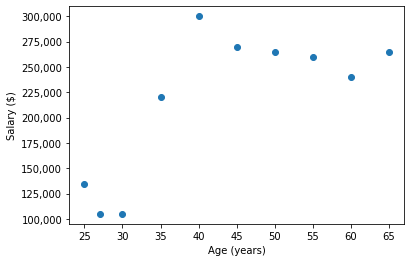

<ipython-input-4-98deb5d57acf>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])


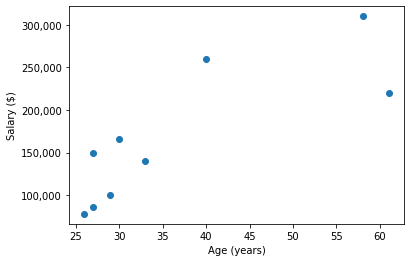

In [4]:
# Define polynomials
data['Age2'] = data['Age']**2
data['Age3'] = data['Age']**3
data['Age4'] = data['Age']**4
data['Age5'] = data['Age']**5

# First 10 data items are training set; the next 10 are the validation set
train = data.iloc[:10] 
val = data.iloc[10:19]

# Train sample
plt.plot(train['Age'], train['Salary'], 'o')
plt.xlabel('Age (years)')
plt.ylabel('Salary ($)')
y_tick = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])
plt.show()

# Validation sample
plt.plot(val['Age'], val['Salary'], 'o')
plt.xlabel('Age (years)')
plt.ylabel('Salary ($)')
y_tick = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])
plt.show()

[3827.30520205]
51160.41527126587


<ipython-input-7-838b25489f9b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])


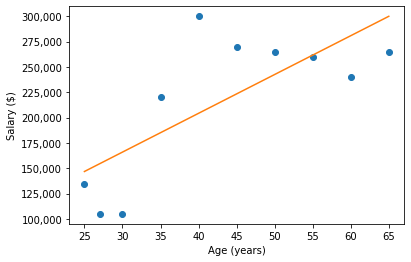

<ipython-input-7-838b25489f9b>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])


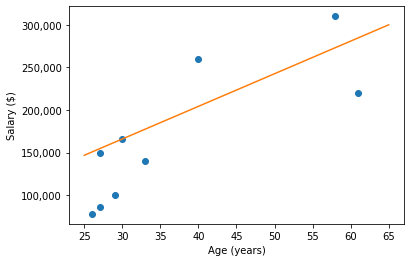

In [7]:
# Linear model
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(train[['Age']],train['Salary'])
print(lr1.coef_)
print(lr1.intercept_)

# Train sample
x = np.linspace(25,65,100)
y_pred1 = lr1.intercept_+lr1.coef_[0]*x
plt.plot(train['Age'], train['Salary'], 'o')
plt.plot(x, y_pred1, '-')
plt.xlabel('Age (years)')
plt.ylabel('Salary ($)')
y_tick = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])
plt.show()

# Validation sample
plt.plot(val['Age'], val['Salary'], 'o')
plt.plot(x, y_pred1, '-')
plt.xlabel('Age (years)')
plt.ylabel('Salary ($)')
y_tick = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])
plt.show()

[-2.31216558e+06  1.07539453e+05 -2.40364225e+03  2.59925927e+01
 -1.09355058e-01]
19198420.86767984


<ipython-input-8-89c8989724df>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])


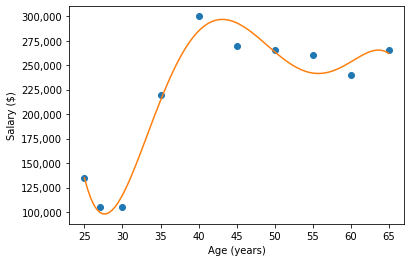

<ipython-input-8-89c8989724df>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])


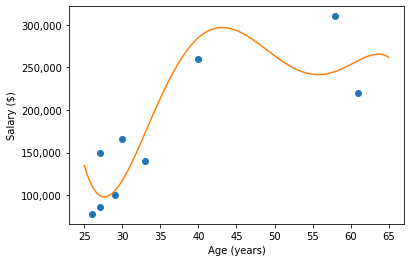

In [8]:
# Polynomial model with degree of 5
lr2=LinearRegression()
lr2.fit(train[['Age','Age2','Age3','Age4','Age5']],train['Salary'])
print(lr2.coef_)
print(lr2.intercept_)

# Train sample
y_pred2 = lr2.intercept_+lr2.coef_[0]*x+lr2.coef_[1]*x**2+lr2.coef_[2]*x**3+lr2.coef_[3]*x**4+lr2.coef_[4]*x**5
plt.plot(train['Age'], train['Salary'], 'o')
plt.plot(x, y_pred2, '-')
plt.xlabel('Age (years)')
plt.ylabel('Salary ($)')
y_tick = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])
plt.show()

# Validation sample
y_pred2 = lr2.intercept_+lr2.coef_[0]*x+lr2.coef_[1]*x**2+lr2.coef_[2]*x**3+lr2.coef_[3]*x**4+lr2.coef_[4]*x**5
plt.plot(val['Age'], val['Salary'], 'o')
plt.plot(x, y_pred2, '-')
plt.xlabel('Age (years)')
plt.ylabel('Salary ($)')
y_tick = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])
plt.show()

[25377.16657071  -243.28859114]
-382171.11154462944


<ipython-input-9-b97dfabaa54d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])


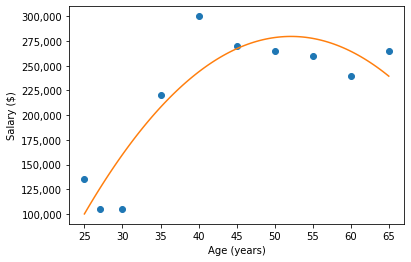

<ipython-input-9-b97dfabaa54d>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])


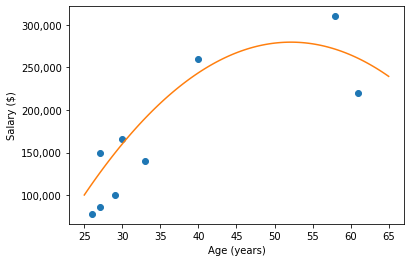

In [9]:
lr3=LinearRegression()
lr3.fit(train[['Age','Age2']],train['Salary'])
print(lr3.coef_)
print(lr3.intercept_)

# Train sample
y_pred3 = lr3.intercept_+lr3.coef_[0]*x+lr3.coef_[1]*x**2
plt.plot(train['Age'], train['Salary'], 'o')
plt.plot(x, y_pred3, '-')
plt.xlabel('Age (years)')
plt.ylabel('Salary ($)')
y_tick = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])
plt.show()

# Validation sample
y_pred3 = lr3.intercept_+lr3.coef_[0]*x+lr3.coef_[1]*x**2
plt.plot(val['Age'], val['Salary'], 'o')
plt.plot(x, y_pred3, '-')
plt.xlabel('Age (years)')
plt.ylabel('Salary ($)')
y_tick = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_tick])
plt.show()